## 14.2 LFDR 예제
### 14.2.1 모의실험

In [1]:
n = 10
m = 20000
set.seed(100)
pre.mu = c(rep(0, 0.8 * m), sort(runif(0.2 * m, 0, 2)))
diff = rep(c(FALSE, TRUE), c(0.8, 0.2) * m)
summary(diff)

   Mode   FALSE    TRUE 
logical   16000    4000 

In [2]:
x = rep(1:0, each = n)
f = factor(x)

In [3]:
install.packages("BiocManager")
BiocManager::install("genefilter")
library(genefilter)
mu = outer(pre.mu, x)
y = matrix(rnorm(m * 2 * n, mean = mu), nrow = m)
t = rowttests(y, f)
ls(t)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com

Bioconductor version 3.17 (BiocManager 1.30.21), R 4.3.1 (2023-06-16)

Installing package(s) 'BiocVersion', 'genefilter'

also installing the dependencies ‘bitops’, ‘zlibbioc’, ‘RCurl’, ‘GenomeInfoDbData’, ‘XVector’, ‘GenomeInfoDb’, ‘plogr’, ‘png’, ‘Biostrings’, ‘matrixStats’, ‘BiocGenerics’, ‘IRanges’, ‘RSQLite’, ‘S4Vectors’, ‘KEGGREST’, ‘XML’, ‘xtable’, ‘MatrixGenerics’, ‘AnnotationDbi’, ‘annotate’, ‘Biobase’


Old packages: 'bit', 'curl', 'dbplyr', 'devtools', 'digest', 'gert', 'highr',
  'isoband', 'pkgload', 'readxl', 'roxygen2', 'rstudioapi', 'testthat',
  'tidyverse', 'whisker', 'xml2', 'boot', 'foreign', 'KernSmooth', 'Matrix',
  'mgcv'



[1] "dm"        "p.value"   "statistic"

In [4]:
install.packages("magrittr")
library(magrittr)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [5]:
t$statistic %<>% (function(x) -1 * x)

In [6]:
t$dm %<>% (function(x) -1 * x)

In [7]:
t$diff.1 = factor(diff, levels = c(TRUE, FALSE))
t$diff.2 = factor(diff)

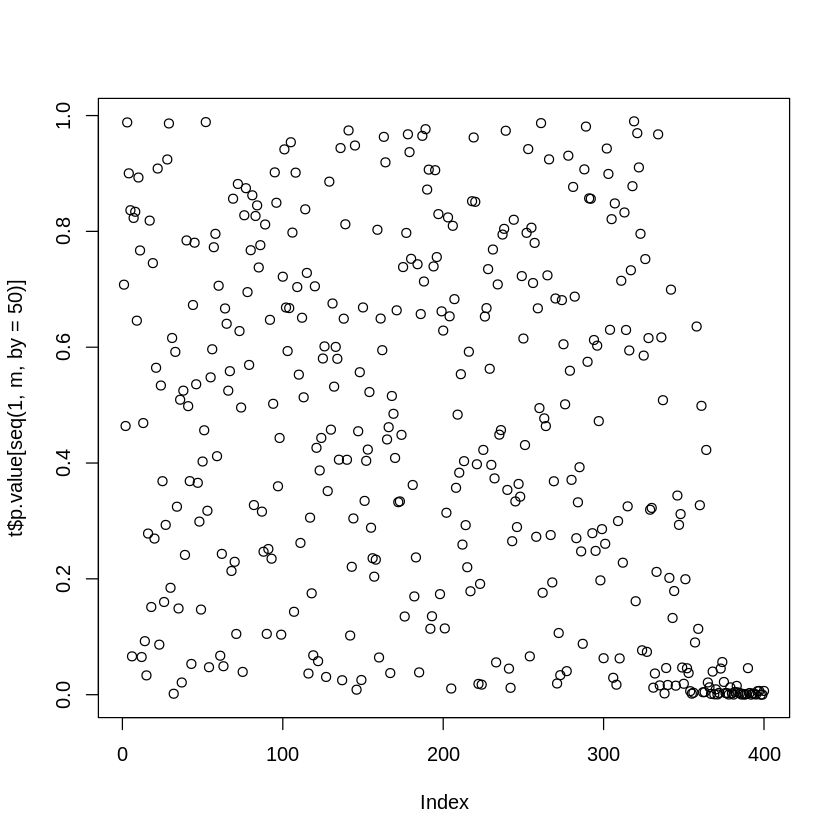

In [8]:
plot(t$p.value[seq(1, m, by = 50)])

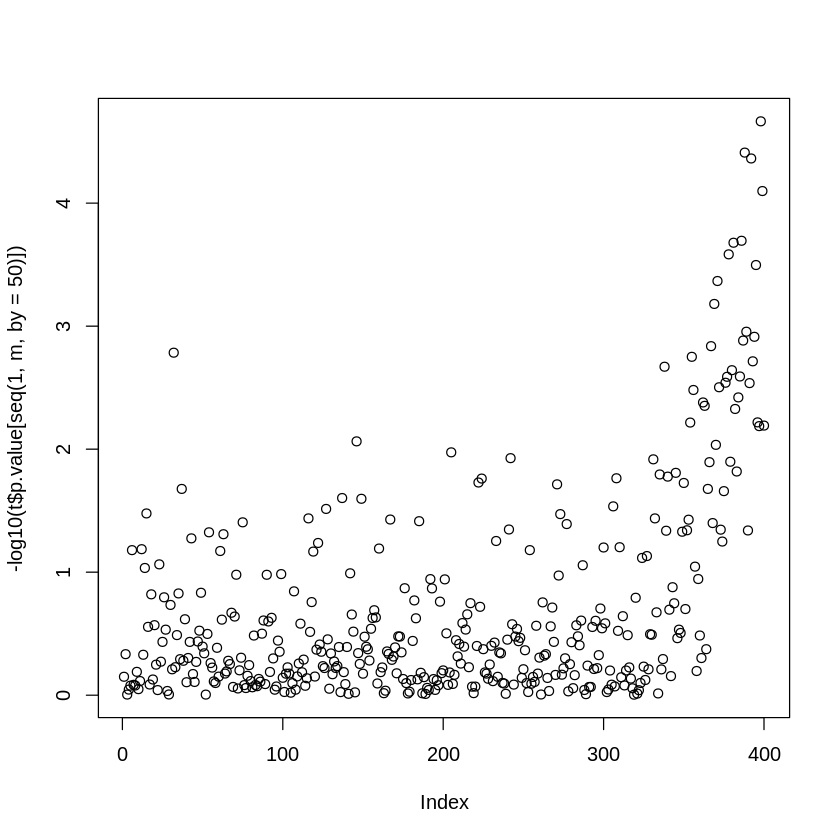

In [9]:
plot(-log10(t$p.value[seq(1, m, by = 50)]))

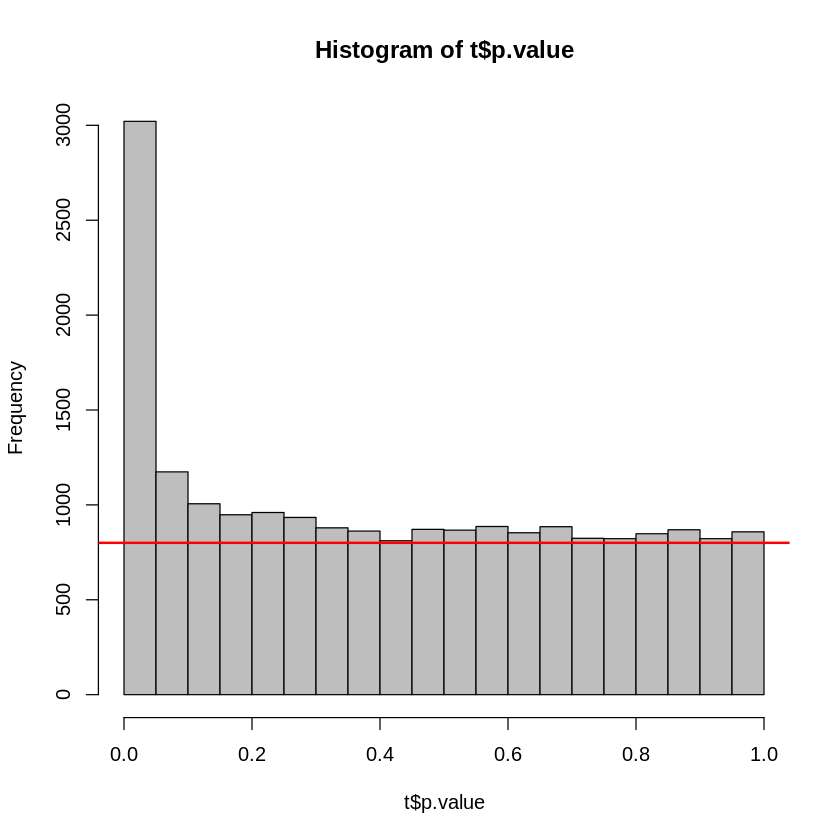

In [10]:
hist(t$p.value, col = "grey", breaks = 0:20/20)
abline(h = 0.8 * m/20, col = "red", lwd = 2)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



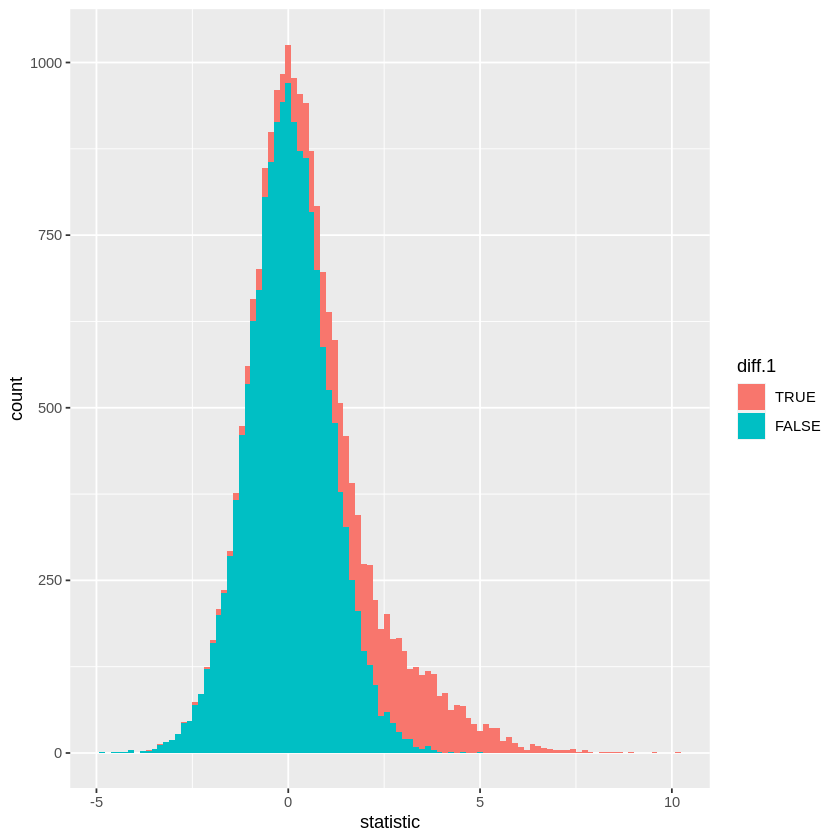

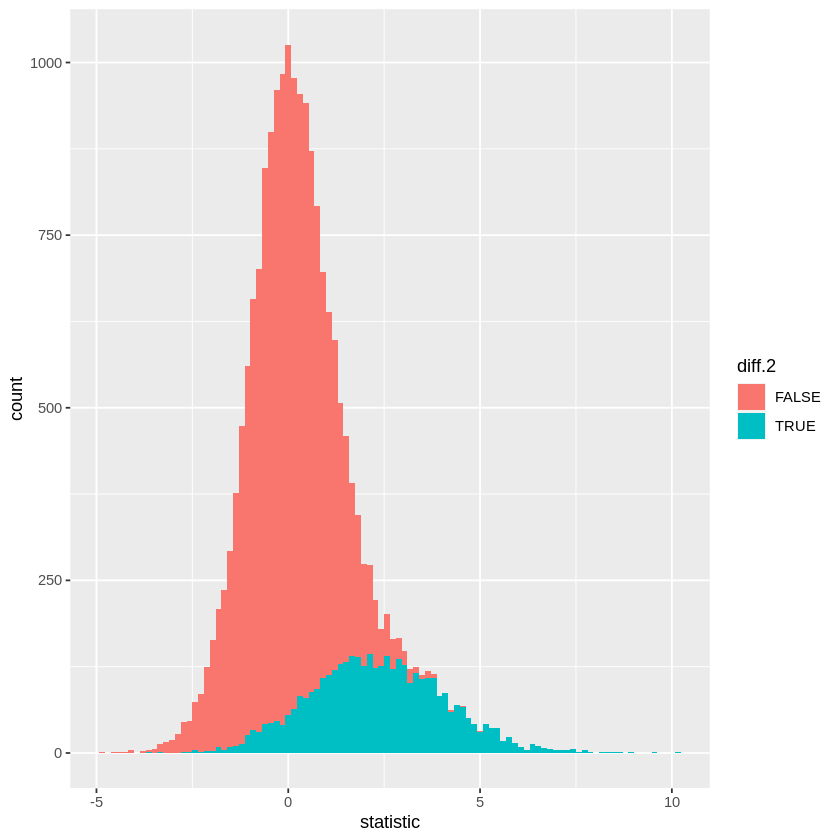

In [11]:
install.packages("ggplot2")
library(ggplot2)
ggplot(t, aes(x = statistic, fill = diff.1)) + geom_histogram(bins = 100)
ggplot(t, aes(x = statistic, fill = diff.2)) + geom_histogram(bins = 100)

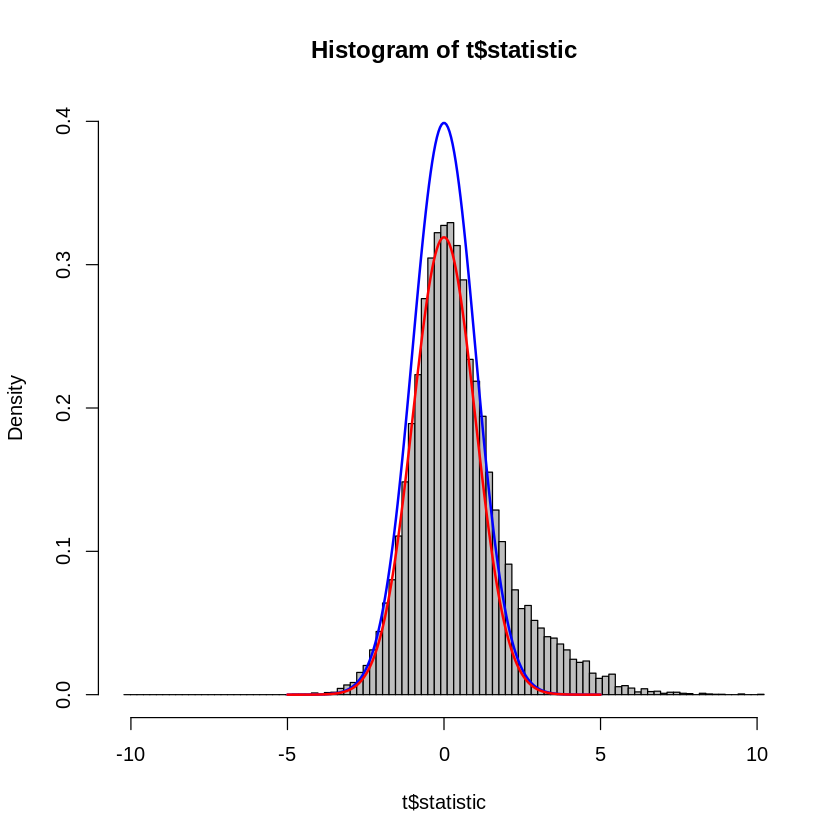

In [12]:
max.t = max(abs(t$statistic))
brks = seq(from = -max.t, max.t, length = 100)
h = hist(t$statistic, breaks = brks, col = "grey", freq = FALSE, ylim = c(0, 0.4))
pi0 = 0.8
s = seq(from = -5, to = 5, length = 200)
lines(s, dnorm(s), col = "blue", lwd = 2)
lines(s, pi0 * dnorm(s), col = "red", lwd = 2)

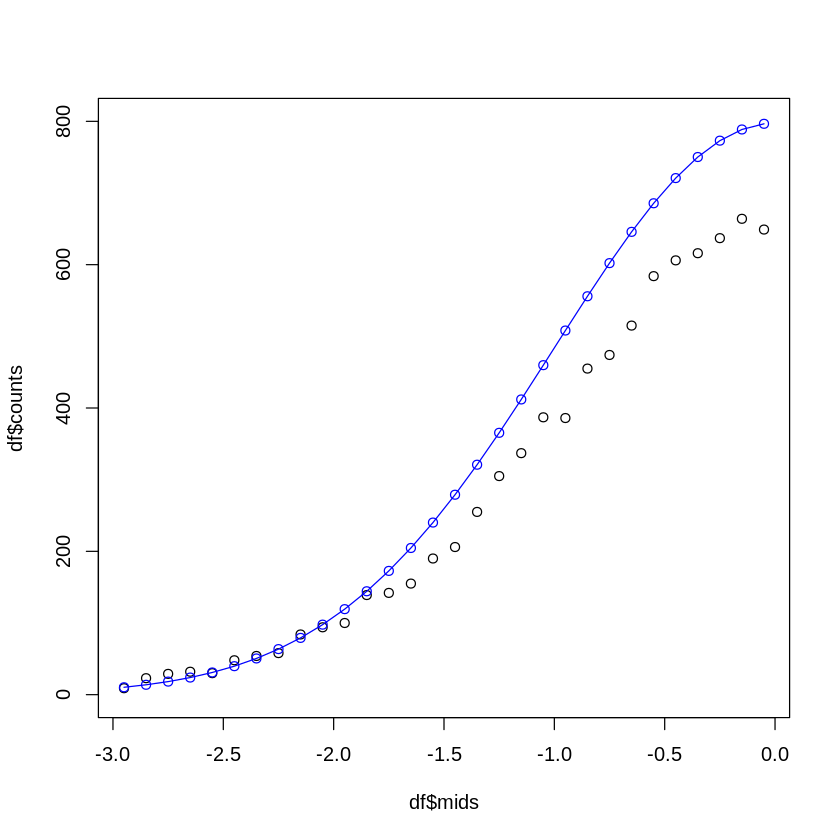

In [13]:
delta = 0.1
brks = seq(from = -20, to = 20, by = delta)
h = hist(t$statistic, breaks = brks, plot = FALSE)
df = data.frame(mids = h$mids, counts = h$counts, density = h$density)
df = df[df$mids > -3 & df$mids < 0,]
plot(df$mids, df$counts, ylim = c(0, 800))
brks = seq(from = -3, to = 0, by = delta)
expected = sapply(seq_len(length(brks)-1), function(i) pnorm(brks[i+1]) - pnorm(brks[i]))
points(df$mids, m * expected, col = "blue", type = "o")

sqrt(exp.counts) 
       0.8271941

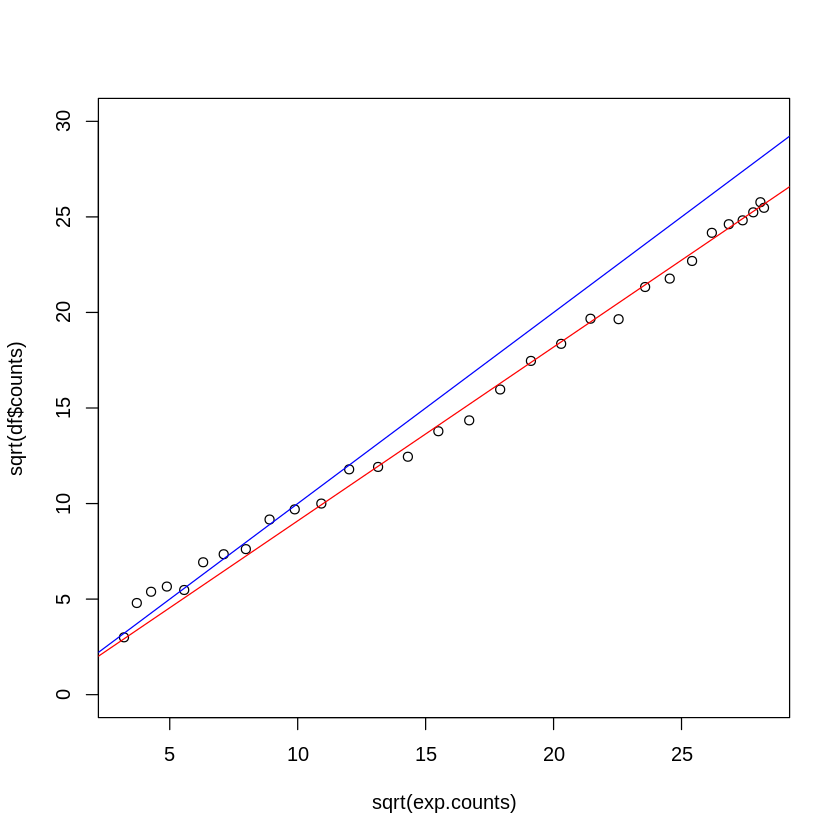

In [16]:
exp.counts = m * expected
plot(sqrt(exp.counts), sqrt(df$counts), ylim = c(0, 30))
fit = lm(sqrt(df$counts) ~ 0 + sqrt(exp.counts))
abline(0, 1, col = "blue")
abline(fit, col = "red")
pi0.hat = coef(fit)[1]^2
pi0.hat

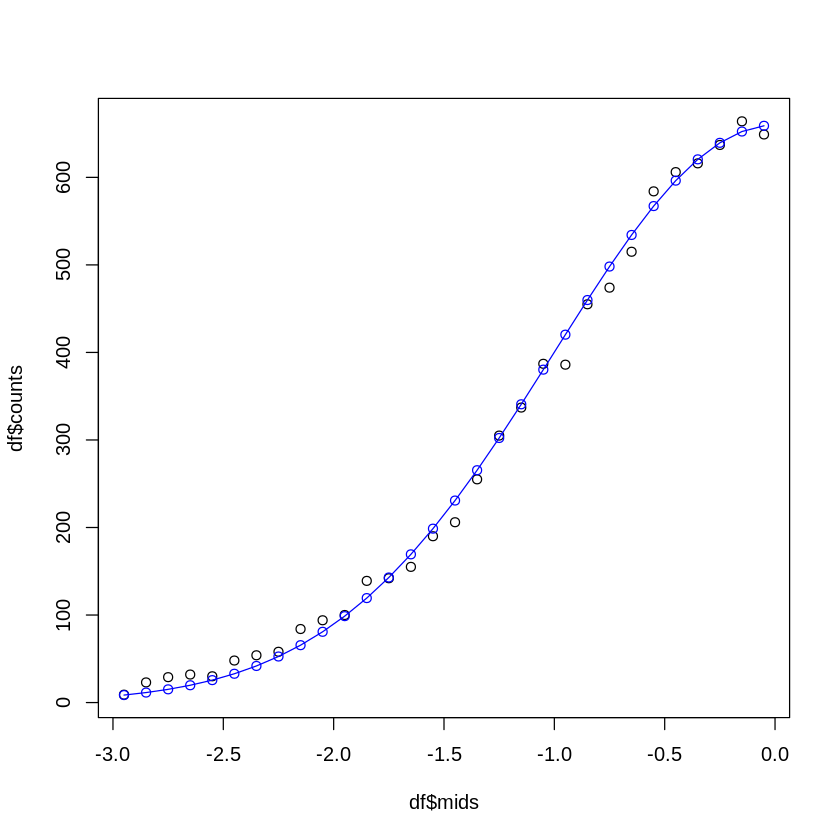

In [17]:
plot(df$mids, df$counts)
points(df$mids, m * pi0.hat * expected, col = "blue", type = "o")

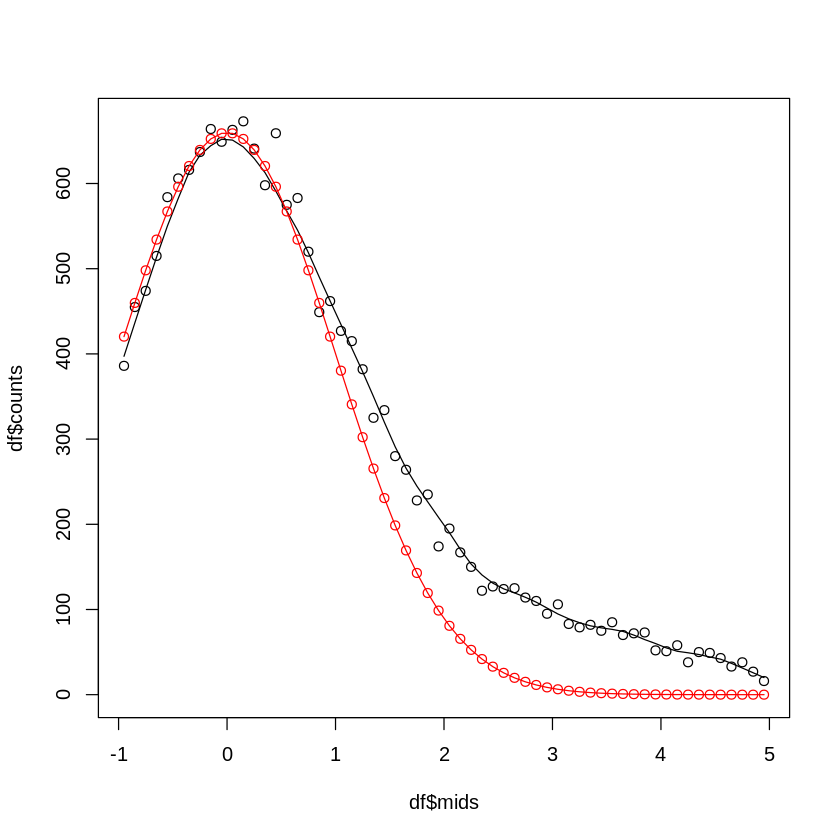

In [18]:
df = data.frame(mids = h$mids, counts = h$counts, density = h$density)
df = df[df$mids > -1 & df$mids < 5,]
plot(df$mids, df$counts, ylim = c(0, max(df$counts)))
lines(lowess(df$counts ~ df$mids, f = 0.15))
brks = seq(from = -1, to = 5, by = delta)
expected = sapply(seq_len(length(brks)-1), function(i) pnorm(brks[i+1]) - pnorm(brks[i]))
points(df$mids, m * pi0.hat * expected, col = "red", type = "o")

## 14.3 {locfdr} 패키지
### 예제 14.1

In [19]:
install.packages("locfdr")
library(locfdr)
data(lfdrsim)
str(lfdrsim)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



'data.frame':	2000 obs. of  2 variables:
 $ mu : num  5.66 5.37 5.2 5.08 4.98 4.9 4.83 4.76 4.71 4.66 ...
 $ zex: num  4.88 6.05 4.93 5.6 5.52 4.98 6.31 3.87 4.25 4.06 ...


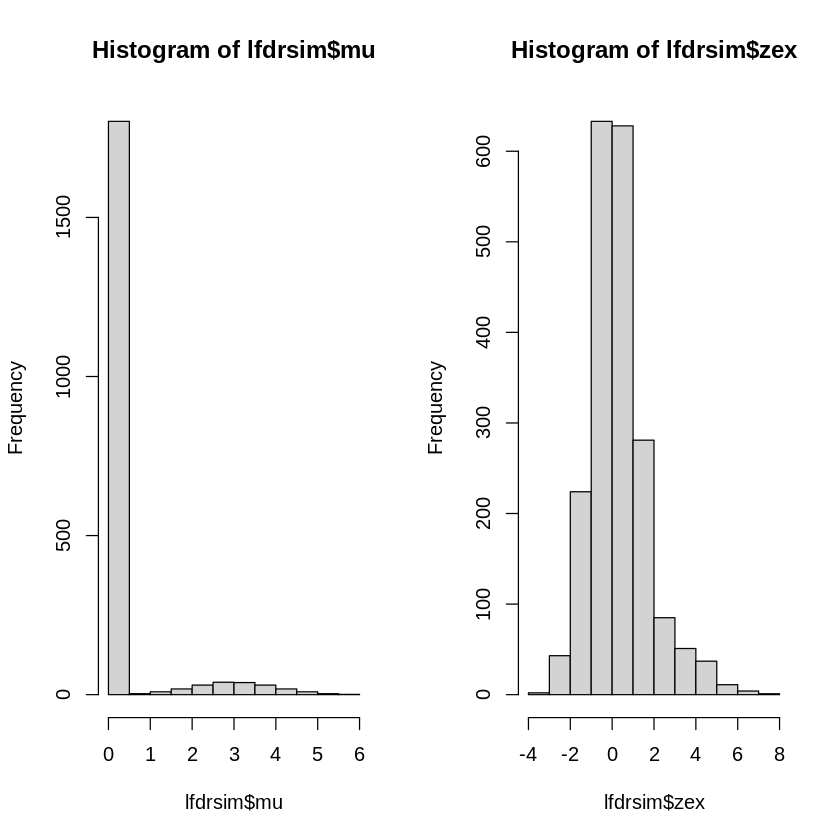

In [20]:
par(mfrow = c(1, 2))
hist(lfdrsim$mu)
hist(lfdrsim$zex)

In [21]:
summary(lfdrsim)

       mu              zex         
 Min.   :0.0000   Min.   :-3.3210  
 1st Qu.:0.0000   1st Qu.:-0.5595  
 Median :0.0000   Median : 0.1341  
 Mean   :0.2992   Mean   : 0.3136  
 3rd Qu.:0.0000   3rd Qu.: 0.9347  
 Max.   :5.6600   Max.   : 7.1200  

[1] "fdr"  "fp0"  "Efdr" "cdf1" "mat"  "z.2"  "call"

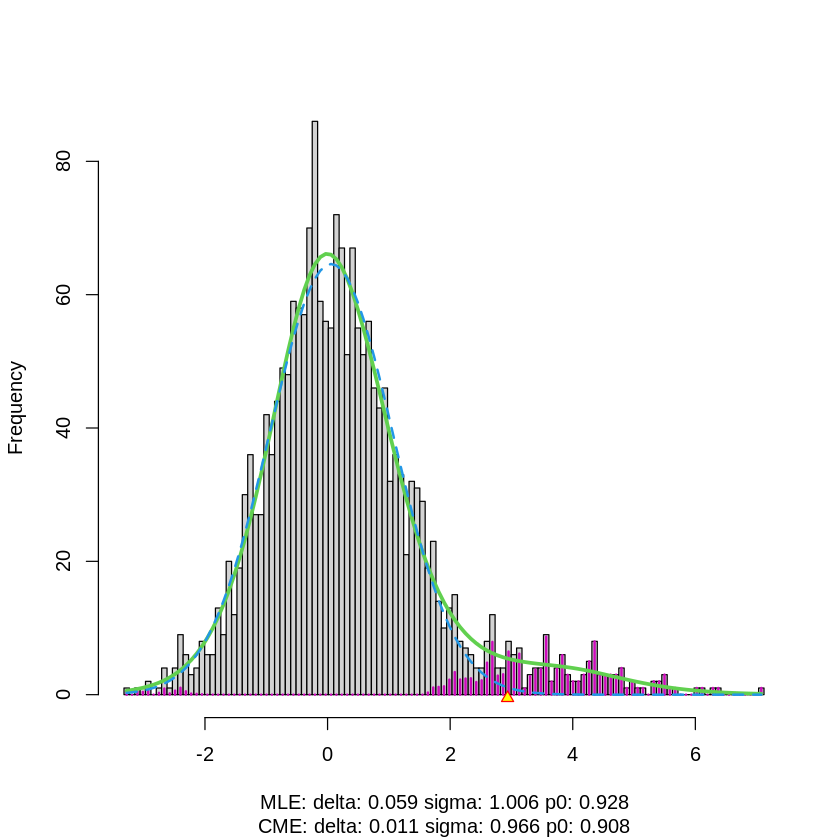

In [22]:
zex = lfdrsim[, 2]
w = locfdr(zex)
names(w)

In [23]:
w$fp0

,delta,sigma,p0
thest,0.00000000,1.00000000,0.93488483
theSD,0.00000000,0.00000000,0.01638130
mlest,0.05913609,1.00598987,0.92793692
mleSD,0.02853215,0.02970003,0.01121705
cmest,0.01137651,0.96576676,0.90831871
cmeSD,0.04211370,0.03380724,0.01381380


In [24]:
w$mat[1:5, ]

x,fdr,Fdrleft,Fdrright,f,f0,f0theo,fdrtheo,counts,lfdrse,p1f1
-3.277130,0.4476285,0.4476285,0.9279369,0.5902186,0.2847162,0.3260307,0.5164208,1,0.5319658,0.3260199
-3.189391,0.4938541,0.4728980,0.9280787,0.7117024,0.3787727,0.4329734,0.5687493,0,0.4945655,0.3602252
-3.101651,0.5408582,0.4998939,0.9282333,0.8579789,0.5000824,0.5705853,0.6217304,1,0.4576673,0.3939340
-3.013912,0.5881378,0.5284586,0.9283997,1.0338087,0.6552407,0.7461681,0.6747682,1,0.4214070,0.4257867
-2.926172,0.6351747,0.5583867,0.9285759,1.2447492,0.8520333,0.9682989,0.7272533,2,0.3859218,0.4541160


In [25]:
which(w$fdr < 0.2)

[1]    1    2    3    4    5    6    7    8    9   10   11   12   13   14   15
 [16]   16   17   18   19   20   21   23   24   25   26   27   28   29   30   31
 [31]   32   33   35   37   38   39   41   42   43   45   46   47   48   49   51
 [46]   52   54   55   56   57   58   59   60   61   62   63   66   67   69   70
 [61]   71   73   74   75   77   78   79   83   85   88   89   90   92   94   95
 [76]   96   98  100  103  104  106  107  109  112  113  118  121  122  125  127
 [91]  128  132  133  135  136  137  141  150  151  160  161  162  165  166  168
[106]  170  324 1508 1732 1898

In [26]:
sum(which(w$fdr < 0.2) > 200)/sum(w$fdr < 0.2)

[1] 0.03636364

In [27]:
w$mat[which(w$mat[, "fdr"] < 0.2)[1], "Fdrright"]

Fdrright 
0.03863531

In [28]:
which(w$mat[, "fdr"] < 0.2)

[1]  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
[20]  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109
[39] 110 111 112 113 114 115 116 117 118 119

In [29]:
which(w$mat[, "fdr"] < 0.2)[1]

[1] 72

$fdr
   [1] 2.940484e-04 2.247470e-06 2.453527e-04 1.616374e-05 2.272654e-05
   [6] 2.002209e-04 6.694561e-07 1.198114e-02 3.096173e-03 6.139388e-03
  [11] 8.569043e-04 2.062340e-03 1.101465e-05 1.539259e-03 2.321304e-03
  [16] 2.931482e-05 3.218043e-03 7.373193e-04 5.432330e-02 4.340601e-04
  [21] 1.659462e-04 2.555764e-01 1.543659e-01 3.551977e-05 1.996955e-03
  [26] 5.432330e-02 3.859895e-02 1.997498e-02 4.427460e-05 1.289356e-01
  [31] 2.359754e-05 3.827395e-03 1.279749e-02 6.335281e-01 5.256410e-07
  [36] 2.132500e-01 1.931570e-03 3.494954e-02 4.103189e-02 3.152017e-01
  [41] 1.332428e-08 7.322227e-02 3.867570e-04 3.340651e-01 1.682793e-06
  [46] 2.231951e-03 9.053513e-03 6.338415e-02 7.532454e-03 9.718155e-01
  [51] 1.996955e-03 1.065617e-03 2.900506e-01 2.885418e-02 1.844894e-01
  [56] 6.109165e-04 1.293570e-03 2.678714e-03 4.251407e-05 2.979367e-02
  [61] 6.109165e-04 8.140877e-03 1.198114e-02 6.691975e-01 7.640388e-01
  [66] 1.157870e-01 3.616601e-02 6.901374e-01 1.997498e-02 

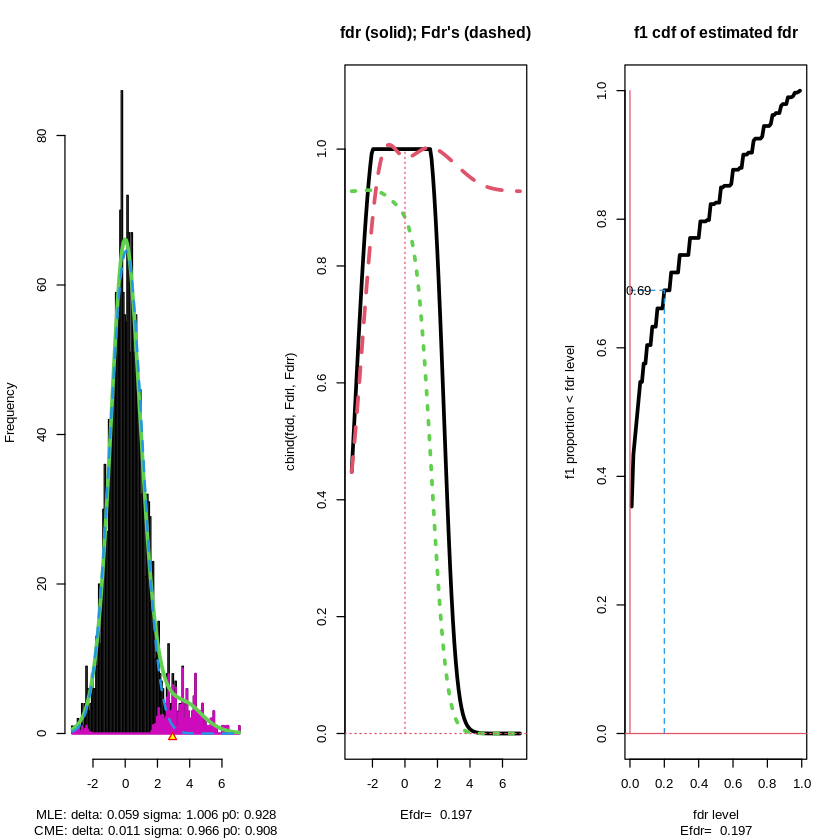

In [30]:
locfdr(zex, plot = 4)